<a href="https://colab.research.google.com/github/yje0515/PythonStudy2025/blob/main/05_02_%EA%B5%90%EC%B0%A8%EA%B2%80%EC%A6%9D_%EA%B7%B8%EB%A6%AC%EB%93%9C%EC%84%9C%EC%B9%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 테스트세트로 평가를 하면 결국 테스트 세트에 맞는 모델이 만들어지는 결론이 나온다.
# 테스트 세트의 일반화 성능을 올바르게 예측하려면 가능한 테스트 세트를 사용하지 말아야한다.
# 모델을 만들고 나서 마지막에 딱 한번 사용하는 것이 좋다.

# 결정트리에서 배운 max_depth = 3 으로 테스트 해봤는데 이게 최선일까?
# 결정트리에서 max_depth 매개변수를 사용한 하이퍼 파라미터 튜닝 해보자.

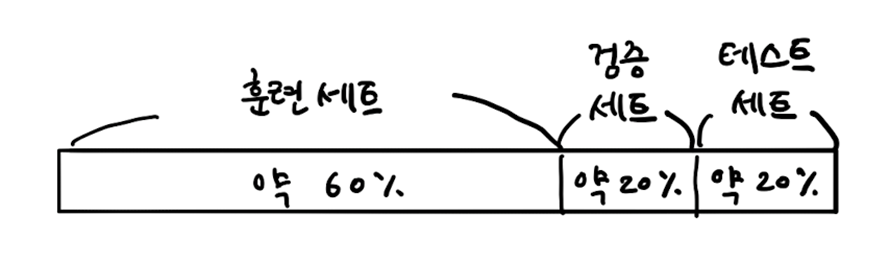

In [ ]:
# 검증세트
# 테스트 세트를 사용하지 않으려고 하면
# 모델이 과대적합인지 과소적합인지 판단하기 어렵다.
# 테스트 세트를 사용하지 않고 훈련세트를 또 나누어 검증해보자
# 훈련 60%, 검증 20%, 테스트 20% -> 실무에서 많이 쓰는 기법

# 테스트하고싶은 매개변수를 바꿔가면서 가장 좋은 모델이 나올 수 있음
# 이 매개변수를 사용해 훈련+검증 세트를 합쳐 전체 훈련데이터에서 모델을 다시! 훈련ㄷ함
# 마 지 막 테스트에서 최종 점수를 평가함
# 훈련세트에서 모델을 훈련하고 검증세트로 모델을 평가함
# 마지막 세트에서 테스트세트를 이용해 최종 점수를 평가함

In [2]:
import pandas as pd
wine = pd.read_csv('https://bit.ly/wine_csv_data')
data = wine[['alcohol','sugar','pH']].to_numpy()
target = wine['class'].to_numpy()

In [3]:
from sklearn.model_selection import train_test_split
train_input,test_input,train_target,test_target = train_test_split(
    data,target,test_size=0.2,random_state=42) # 20%
# 원본데이터 6497개 20% -> train(5197), test(1300)
print(train_input.shape,test_input.shape)

(5197, 3) (1300, 3)


In [5]:
# 훈련세트에서 검증세트 다시 생성 (80%의 20%)
sub_input,val_input,sub_target,val_target = train_test_split(
    train_input,train_target,test_size=0.2,random_state=42
)
print(sub_input.shape,val_input.shape)
# 훈련용sub-(4157) 검증용val-(1040)

(4157, 3) (1040, 3)


In [10]:
# 훈련/검증 데이터를 사용해 모델을 만들고 평가함
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(sub_input,sub_target) # 훈련

print(dt.score(sub_input,sub_target)) # 99.71% 과대적합
print(dt.score(val_input,val_target)) # 86.44 검증
# 매개변수를 바꿔서 더 좋은 모델을 찾아보자

0.9971133028626413
0.864423076923077


In [11]:
# 검증세트를 만드느라 훈련세트가 줄었음 (데이터가 많으면 좋은 결과가 나옴)
# 교차검증 : 검증세트를 떼어내어 평가하는 과정을 여러범 반복함
# [훈련, 훈련, 검증]
# [훈련, 검증, 훈련]
# [검증, 훈련, 훈련] -> 패리티Parity 방식(3-폴드 교차 검증) 5,10-폴드도 있음

# 사이킷런의 cross_validata()라는 교차 검증 함수를 사용
from sklearn.model_selection import cross_validate

# 평가할 모델 객체를 첫번째 매개변수로 전달 ( 검증세트를 떼지 않고 훈련세트 전체를 전달)
scores = cross_validate(dt,train_input,train_target)
# cv매개변수를 이용해 폴드 수를 변경함 cv = 5(기본값)
print(scores)
# fit_time : 훈련시간, score_time : 훈련시간, test_score(최종점수) 키를 가진 딕셔너리(key:value)

{'fit_time': array([0.01794505, 0.01523709, 0.01540351, 0.01913261, 0.01436067]), 'score_time': array([0.0019815 , 0.00196648, 0.00745201, 0.00196147, 0.00197387]), 'test_score': array([0.86923077, 0.84615385, 0.87680462, 0.84889317, 0.83541867])}


In [ ]:
# {'fit_time : 훈련시간 ': array([0.01590347, 0.01357985, 0.0125258 , 0.01266432, 0.01209831]),
#  'score_time : 검증시간 ': array([0.0026319 , 0.00208259, 0.00182867, 0.00198817, 0.00206494]),
#  'test_score : 검증점수 ': array([0.86923077, 0.84615385, 0.87680462, 0.84889317, 0.83541867])}

In [12]:
import numpy as np

print(np.mean(scores['test_score'])) # test_score 이름이지만 검증폴드의 검증점수임
# 5개의 검증점수를 평균을 내어 최종 점수를 얻는다 85.53%

0.855300214703487


In [13]:
# 주의 : cross_validate()는 훈련세트를 섞어서 폴드를 나누지 않음 -> 분할기splitter 사용
# 앞서 우리는 train_test_split() 함수로 전체 데이터를 섞은 후 훈련세트를 준비했음
# 만약 교차 검증을 할 때 훈련세트를 섞을며녀 분할기 splitter를 지정해야한다

# 사이킷런의 분할기는 교차검증에서 폴드를 어떻게 나눌지 결정함
# cross_validate()는 기본적으로 회귀모델인 kFold 분할기를 사용함

# 분류 모델일 경우 target 클래스를 골고루 나누기 위해서 StratifiedKFold를 사용한다
from sklearn.model_selection import StratifiedKFold

# scores = cross_validate(dt,train_input,train_target,cv=StratifiedKFold()) 클래스를 냅따 넣음
splitter = StratifiedKFold() # 클래스를 변수에 넣어 동적으로 사용가능하게 하는걸 권장
scores = cross_validate(dt,train_input,train_target,cv=splitter)
print(scores)

{'fit_time': array([0.02055764, 0.01408648, 0.01503229, 0.01518011, 0.02763247]), 'score_time': array([0.00203037, 0.00170183, 0.00196385, 0.00367951, 0.00349617]), 'test_score': array([0.86923077, 0.84615385, 0.87680462, 0.84889317, 0.83541867])}


In [14]:
# {'fit_time': array([0.02692175, 0.03336358, 0.02086091, 0.03042316, 0.02657533]),
#  'score_time': array([0.00191808, 0.00214911, 0.00205112, 0.00239015, 0.00949883]),
#   'test_score': array([0.86923077, 0.84615385, 0.87680462, 0.84889317, 0.83541867])}
print(np.mean(scores['test_score']))   # 85.53%

0.855300214703487


In [15]:
splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42) # 10-폴드 교차 검증 수행
scores = cross_validate(dt, train_input, train_target, cv=splitter)
print(scores)   # 10번의 교차검증이 진행
print(np.mean(scores['test_score']))    # 10번의 검증 평균 85.74%

{'fit_time': array([0.01717949, 0.01804733, 0.01709342, 0.01752162, 0.01673555,
       0.01655984, 0.01659703, 0.0168643 , 0.01742196, 0.01681519]), 'score_time': array([0.00170803, 0.00159001, 0.00204897, 0.00165153, 0.00162792,
       0.00156665, 0.00158024, 0.00180292, 0.00177717, 0.00160503]), 'test_score': array([0.83461538, 0.87884615, 0.85384615, 0.85384615, 0.84615385,
       0.87307692, 0.85961538, 0.85549133, 0.85163776, 0.86705202])}
0.8574181117533719


In [ ]:
# 결정트리의 매개변수 값을 바꿔가며 가장 좋은 성능이 나오는 모델을 찾아봐야함
# 테스트 세트를 사용하지 않고 교차 검증을 통해서 좋은 모델을 골라야 함

# <하이퍼 파라미터 튜닝>
# model parameter : 머신러닝 모델이 학습하는 파라미터
# hyper parameter : 사용자가 지정해야 하는 파라미터
# hyper parameter tuning : 라이브러리가 제공하는 기본값을 그대로 사용해 모델을 훈련
#                         그 다음 검증세트의 점수나 교차검증을 통해서 매개변수를 조금씩 변경
#                         1~2, 5~6개의 매개변수를 제공
# AutoML : 사람의 개입 없이 하이퍼파라미터튜닝을 자동으로 수행하는 기술

# Max_depth를 최적으로 고정하고 min_sample_split을 바꿔가며 최적의 값을 찾는다면 값이 함께 변경됨
# -> 두개의 매개변수를 동시에 바꿔가며 최적의 값을 찾아야함(다중 for문? 복잡해짐)

In [16]:
# 사이킷런의 그리드서치가 제공해줌!
from sklearn.model_selection import GridSearchCV
# min_impurity_decrease 매개변수의 최적값을 찾아보자
# min_sample_split : 샘플이 최소 몇개 이상이어야 하위노드로 분리split 할 것인지
#                   클수록 가지치기(과대적합 방지), 작을수록 정확하게(과대적합?)
# 매개변수와 담색할 값의 리스트를 딕셔너리로 만듦
params = {'min_impurity_decrease' : [0.0001,0.0002,0.0003,0.0004,0.0005]}
# params = {'min_impurity_decrease': np.arange(0.0001, 0.001, 0.0001), # 9번
#           'max_depth': range(5, 20, 1),                              # 5~20까지 15번
#           'min_samples_split': range(2, 100, 10)   # 분할 할 수 있는 샘플수를 지정 2~100까지 10번
#           }

# 결정 트리 클래스의 객체를 생성 후 바로 전달
# 일반 모델을 훈련하는 것 처럼 fit() 메서드를 호출함
# 이 메서드는 호출하면 Search 객체는 결멍트리모델의 min_impurity_decrease 값을 바꿔가면서 총 5번 수행
# GridSearchCV의 cv 매개변수 기본 값은 5 -> 5*5 25번 수행
# n_jobs에서 병렬실행에 사용될 CPU 코어 수를 지정함 (-1 : 모든 코어)
gs = GridSearchCV(DecisionTreeClassifier(random_state=42),params,n_jobs=-1)
gs.fit(train_input,train_target) # 그리드 서치를 이용한 훈련시작
# 교차검증에서 최적의 하이퍼파라미터를 찾으면 전체 훈련 세트로 모델을 다시 만들어야 하지만
# 사이킷런의 그리드 서치는 검증 점수가 가장 높은 모델의 매개변수 조합으로
# 전체 훈련 세트에서 자동으로 다시 모델을 훈련함

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'min_impurity_decrease': [0.0001, 0.0002, 0.0003,
                                                   0.0004, 0.0005]})

In [19]:
# 이렇게 최적화되어 훈련된 모델은 GridSearchCV 클래스로 만들어진
# 객체의 best_estimator_ 속성에 저장되어있다.
# 최적의 매개변수는 best_params_ 속성에 저장되어있다.
print(f"그리드 서치를 통해 찾은 최적 모델의 정확도 : {dt.score(train_input,train_target)*100:.2f}%")

그리드 서치를 통해 찾은 최적 모델의 정확도 : 97.06%


In [20]:
print(f"최적의 매개변수 : {gs.best_params_}")
# 각 매개변수에서 수행한 교차 검증의 평균 점수는
#cv_results 속성의 mean_test_score 키에 저장되어있다.

최적의 매개변수 : {'min_impurity_decrease': 0.0001}


In [21]:
# 5번의 교차 검증으로 얻은 점수를 출력해보자
print(gs.cv_results_['mean_test_score'])
# 첫번째 값 0.86819297이 가장 크다

[0.86819297 0.86453617 0.86492226 0.86780891 0.86761605]


In [27]:
# 눈으로 보는 것 보다 numpy의 argmax() 함수를 사용하면 가장 큰 값의 인덱스를 추출할 수 있다.
# 그 다음 이 인덱스를 사용해서 params 키에 저장된 매개변수를 출력해보자.
# 이 값이 최상의 검증 점수를 만든 매개변수의 조합이 된다!
best_index = np.argmax(gs.cv_results_['mean_test_score'])
print(f"best_index : {best_index}")
print(gs.cv_results_['params'][best_index]) # 앞에서 출력한 best_param_과 같은지 확인

# 1. 탐색할 매개변수 지정
# 2. 훈련세트에서 GridSearch 수행, 최상의 평균 검증 점수가 나오는 매개변수 조합을 찾음
#    -> 그리드 서치에 저장
# 3. 그리드 서치는 최상의 매개변수에서 전체 훈련 세트를 사용해 최종 모델을 훈련
#    -> 그리드 서치에 저장

best_index : 0
{'min_impurity_decrease': 0.0001}


In [28]:
# 조금 더 복잡한 매개변수 조합
# 노드를 분할하기 위한 불순도 감소 최소량 지정 max_depth(트리의 깊이)
# min_samples_split 노드를나누기 위한 최소 샘플 수
# numpy arange() 함수는 첫번째 매개변수 값에서 시작해서
# 두번째 매개변수에 도달할 때 까지 세번째 매개변수를 계속 더한 배열을 만듦

# 0.0001 ~ 0.001 까지 0.0001을 더한 배열 (두번째 매개변수 포함 X) : 9번
# 파이썬 range() 함수는 정수만 사용가능 5~20까지 1씩 증가 = 15개
# 교차 검증 회수 9*15*10=1350개 * 5(5-폴드교차) = 6750개
params = {'min_impurity_decrease': np.arange(0.0001, 0.001, 0.0001), # 9번
          'max_depth': range(5, 20, 1),                              # 5~20까지 15번
          'min_samples_split': range(2, 100, 10)   # 분할 할 수 있는 샘플수를 지정 2~100까지 10번
          }

# criterion : 분할 품질을 측정하는 기능 (default : gini)
# splitter : 각 노드에서 분할을 선택하는 데 사용되는 전략 (default : best)
# max_depth : 트리의 최대 깊이 (값이 클수록 모델의 복잡도가 올라간다.)
# min_samples_split : 자식 노드를 분할하는데 필요한 최소 샘플 수 (default : 2)
# min_samples_leaf : 리프 노드에 있어야 할 최소 샘플 수 (default : 1)
# min_weight_fraction_leaf : min_sample_leaf와 같지만 가중치가 부여된 샘플 수에서의 비율
# max_features : 각 노드에서 분할에 사용할 특징의 최대 수
# random_state : 난수 seed 설정
# max_leaf_nodes : 리프 노드의 최대수
# min_impurity_decrease : 최소 불순도
# min_impurity_split : 나무 성장을 멈추기 위한 임계치
# class_weight : 클래스 가중치
# presort : 데이터 정렬 필요 여부

gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)
gs.fit(train_input, train_target) # 훈련시작

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(5, 20),
                         'min_impurity_decrease': array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
       0.0009]),
                         'min_samples_split': range(2, 100, 10)})

In [30]:
print(gs.best_params_) # 최상의 매개변수 조합확인
# {'max_depth': 14, 'min_impurity_decrease': 0.0004, 'min_samples_split': 12}

{'max_depth': 14, 'min_impurity_decrease': np.float64(0.0004), 'min_samples_split': 12}


In [31]:
print(np.max(gs.cv_results_['mean_test_score'])) # 최상의 교차 점수 확인
# 개선점 : 탐색할 매개변수 간격을 0.0001 혹은 1로 설정 했는데 근거 부족(좁히거나 넓힐 필요성?)

0.8683865773302731


In [33]:
# 매개변수의 값이 수치일 때 값의 범위나 간격을 미리 정하기 어려울 수 있음
# 너무 많은 매개 변수 조건이 있어 그리드 서치 수행시간이 오래 걸림

# 해결 : 랜덤 서치를 사용해보자.

# 랜덤서치 : 매개변수의 값의 목록을 전달하는 것이 아니라 매개변수를 샘플링할 수 있는 확률 분포도 객체를 전달
# 싸이파이 : 파이썬의 핵심 과학 라이브러리로 적분, 보간, 선형대수, 확률 등 포함한 수치 계산용 전용 라이브러리(코랩에 내장)

from scipy.stats import uniform, randint
# uniform, randint 클래스는 모두 주어진 범위에서 고르게 값을 뽑는다.(균등 분포에서 샘플링)
# randint()에서는 정수값을 추출, uniform()은 실수값을 뽑음

In [49]:
# 랜덤 서치 테스트
rgen = randint(0,10) # 10개 숫자를 샘플링
rgen.rvs(10)

array([4, 8, 5, 5, 7, 6, 7, 6, 7, 2])

In [50]:
np.unique(rgen.rvs(1000),return_counts=True) #1000개를 샘플링해서 각 숫자의 개수를 세어봄

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([104, 110, 110, 108,  96,  86,  96, 104,  84, 102]))

In [51]:
ugen = uniform(0,1) # 실수형 테스트
ugen.rvs(10) # 실수형 난수 발생기 (랜덤과 유사)

array([8.23488105e-01, 2.61352847e-01, 2.47945046e-01, 8.70860499e-01,
       4.10320844e-01, 3.24124971e-01, 1.47532846e-01, 1.65923080e-01,
       1.38357847e-01, 6.61843112e-04])

In [59]:
# 탐색할 매개변수의 딕셔너리를 만들자
# min_samples_leaf를 탐색 대상에 추가 (랜덤한 값을 하이퍼파라미터 값으로 적용)
params = {'min_impurity_decrease':uniform(0.0001,0.001), # 0.0001~0.001 사이 실수값
          'max_depth':randint(20,30), # 20~50 사이 정수
          'min_samples_split':randint(2,25), # 2~25 사이 정수
          'min_samples_leaf':randint(1,25) # 1~ 25 사이 정수
          # 리프노드가 되기위한 최소 샘플 갯수
          # 자식 노드의 샘플수가 이 값보다 작으면 분할 X
          }

In [62]:
# 어차피 하이퍼파라미터의 매개값을 랜덤으로 하기로 했으니
# 검증하는 cv 클래스도 랜덤용으로 사용해보자
# 샘플링 횟수는 사이킷 런의 랜덤 서치 클래스인 RandomizedSearchCV의 n_iter 매개변수에 지정
from sklearn.model_selection import RandomizedSearchCV
gs = RandomizedSearchCV(DecisionTreeClassifier(random_state=42),params,
                        n_iter=100,n_jobs=-1,random_state=42)
# n_iter =100 총 100번을 샘플링하여 교차 검증을 수행 (최적의 매개변수 조합을 찾음)
gs.fit(train_input,train_target)

RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f61798673b0>,
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f6179866ab0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f6179866cc0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f6179865160>},
                   random_state=42)

In [63]:
print(gs.best_params_) # 결과 최적의 매개변수 조합을 찾음
# {'max_depth': 39, 'min_impurity_decrease': 0.00034102546602601173,
#  'min_samples_leaf': 7, 'min_samples_split': 13}


{'max_depth': 23, 'min_impurity_decrease': np.float64(0.00034102546602601173), 'min_samples_leaf': 7, 'min_samples_split': 13}


In [64]:
print(np.max(gs.cv_results_['mean_test_score'])) # 최고의 교차 검증 점수 확인
# 86.95%

0.8695428296438884


In [66]:
dt = gs.best_estimator_
print(dt.score(test_input,test_target))
# 86.00%

0.86


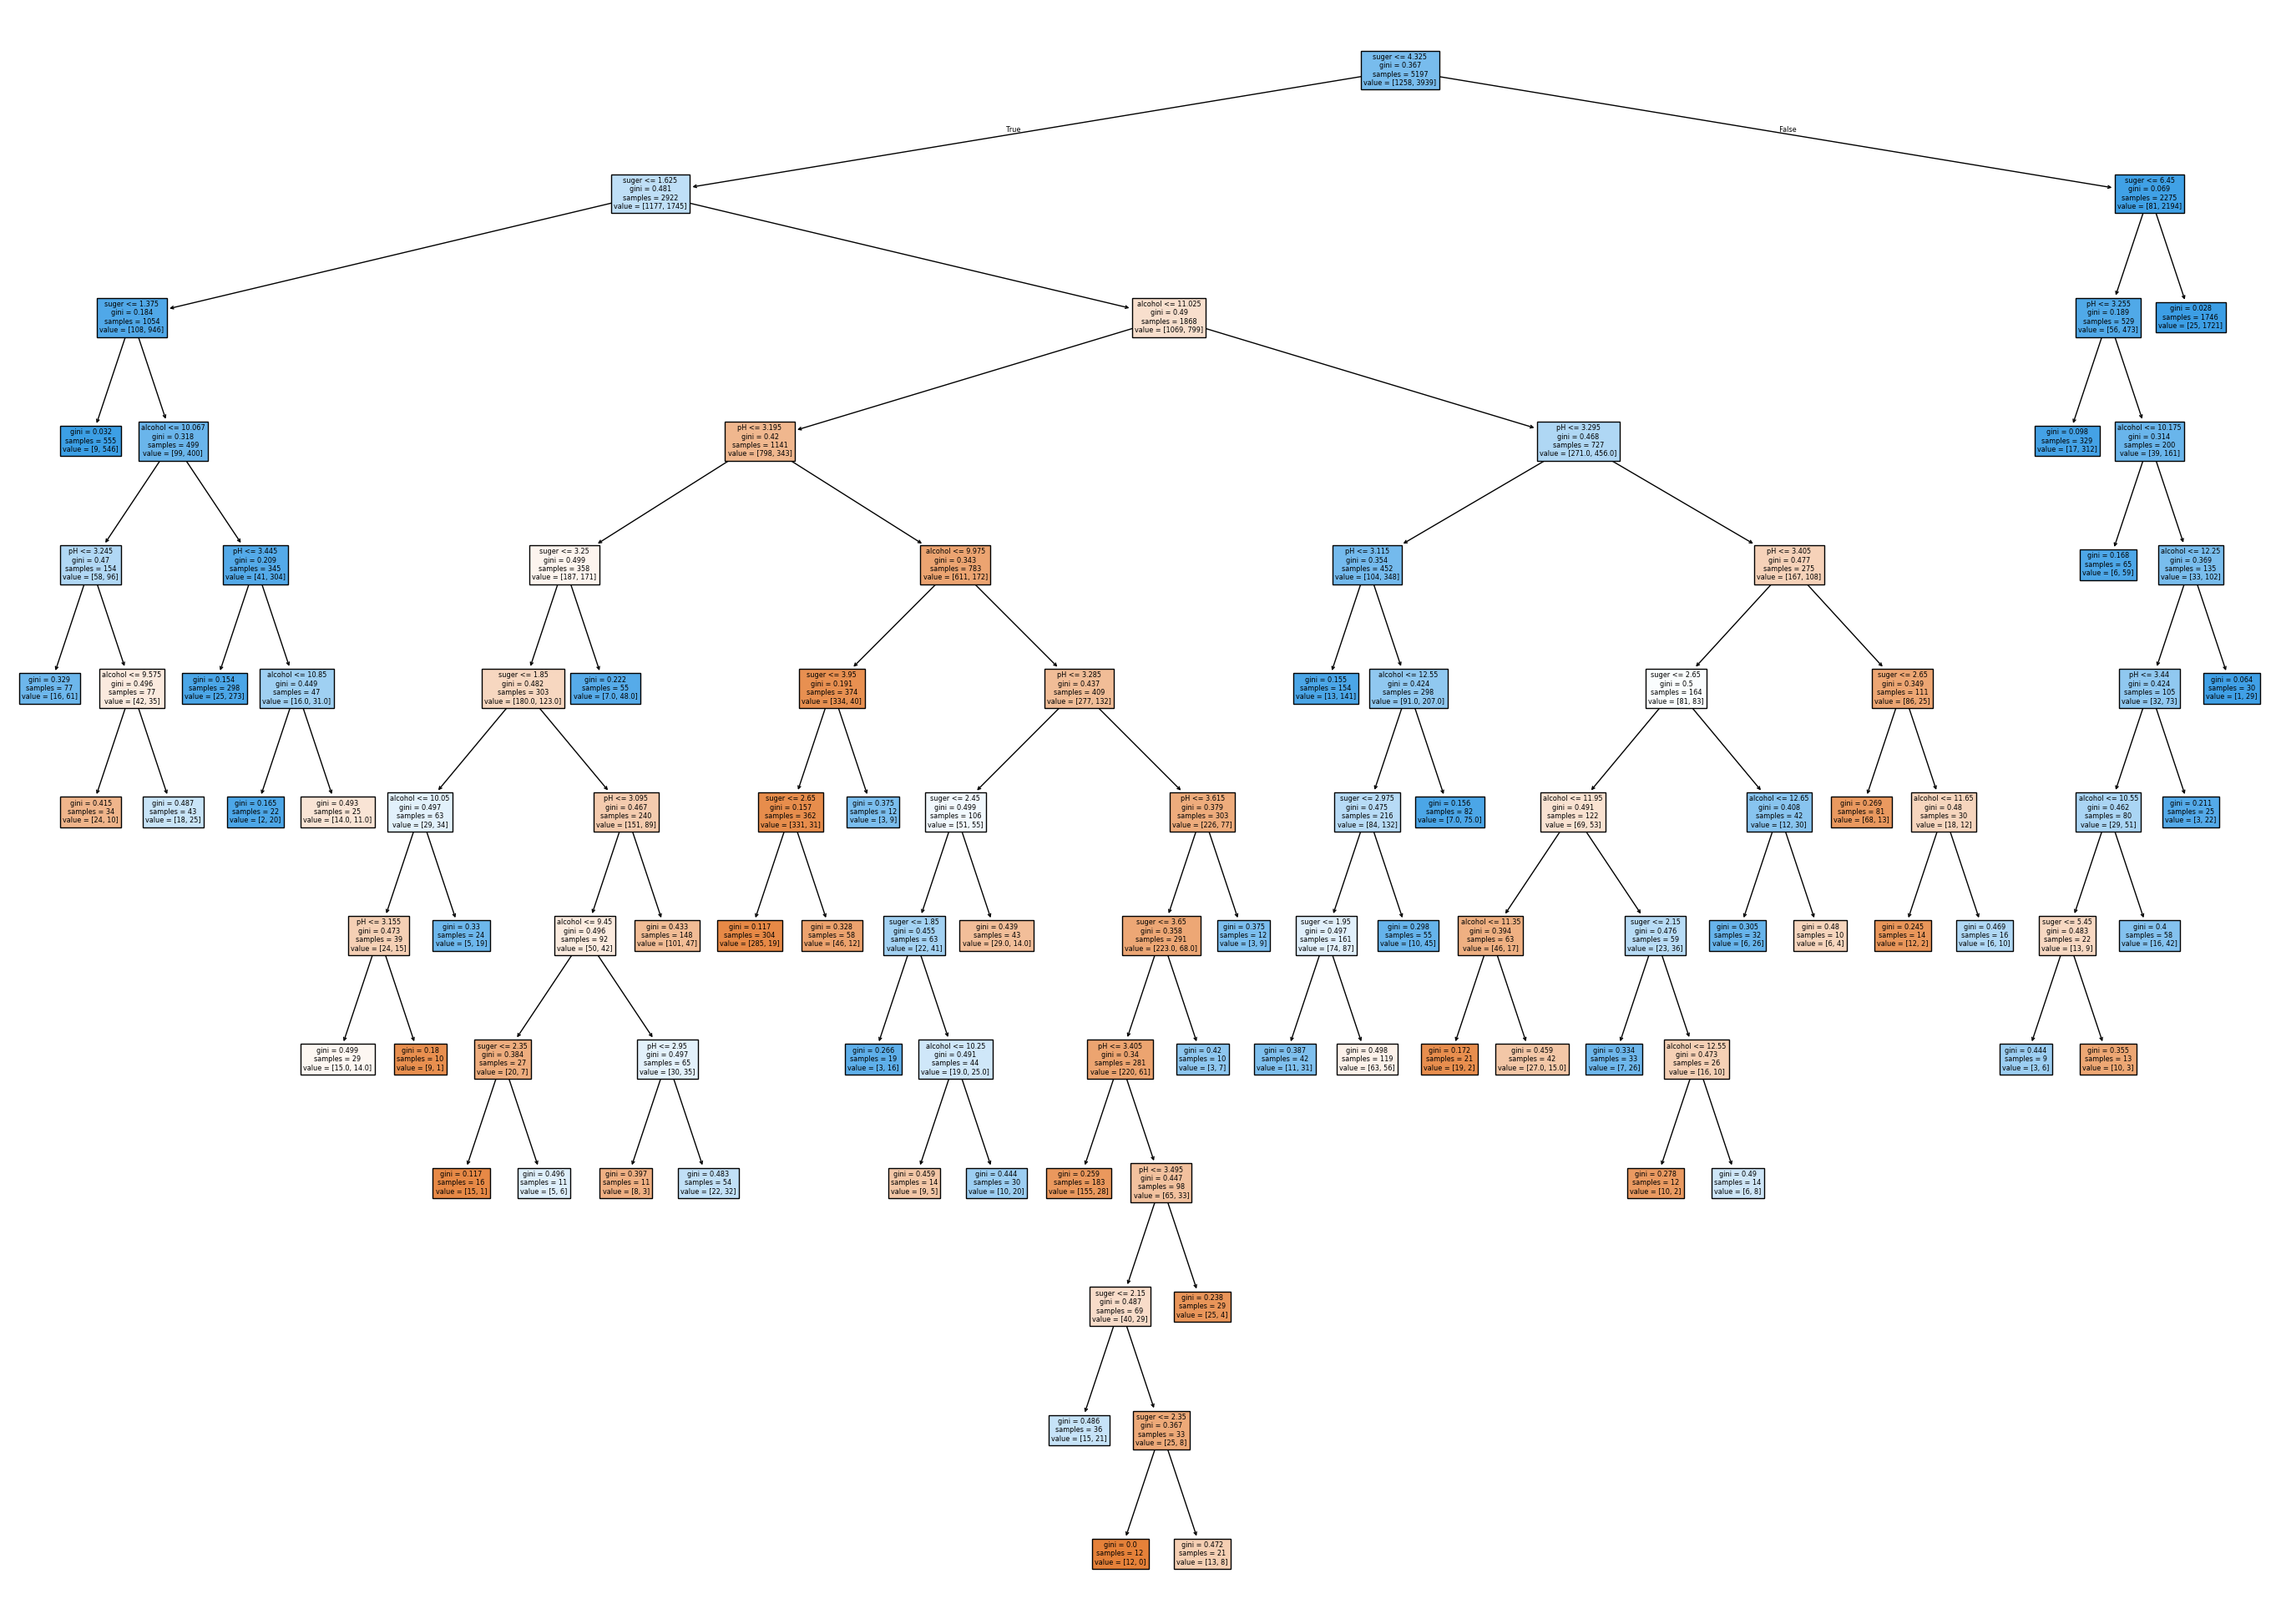

In [67]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(35,25))
plot_tree(dt,filled=True,feature_names=['alcohol','suger','pH'])
plt.show()

In [68]:
gs.predict_proba(test_input[0:5])

array([[0.01431844, 0.98568156],
       [0.9375    , 0.0625    ],
       [0.01431844, 0.98568156],
       [0.01431844, 0.98568156],
       [0.01431844, 0.98568156]])